### 1) Importing modules

In [83]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

In [84]:
iris = datasets.load_iris()

I'm here using the iris dataset

In [85]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [86]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [87]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [88]:
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

In [89]:
df['target'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [90]:
df['name'] = df['target'].apply(lambda x: 'sentosa' if x==0 else ('versicolor' if x==1 else 'virginica'))

the above code names the dataset properly with the name of it, since it was hard reading using the target column

In [91]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,sentosa
1,4.9,3.0,1.4,0.2,0,sentosa
2,4.7,3.2,1.3,0.2,0,sentosa
3,4.6,3.1,1.5,0.2,0,sentosa
4,5.0,3.6,1.4,0.2,0,sentosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [92]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [93]:
df.groupby(['name']).describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
name                                                                       
sentosa                 50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal width (cm)      target       \
                      count   mean  ...              75%  max  count mean   
name                                ...                                     
sentosa                50.0  3.428  ...              0.3  0.6   50.0  0.0   
versicolor             50.0  2.770  ...              1.5  1.8   50.0  1.0   
virginica              50.0  2.974  ...              2.3  2.5   50.0  2.0   

                                          
            std  min  25%  50%  75%  max  
name                                      
sentosa     0.0  0.0  0.0  0.0  0.0  0.0  
versicolor  0.0  1.0  1.0  1.0  1.0  1.0  
virginica   0.0  2.0  2.0  2.0  2.0  2.0  

[3 rows x 40 columns]

### 2) Data Visualization

In [94]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'name'],
      dtype='object')

### im just making a function in order not to repeat the same code

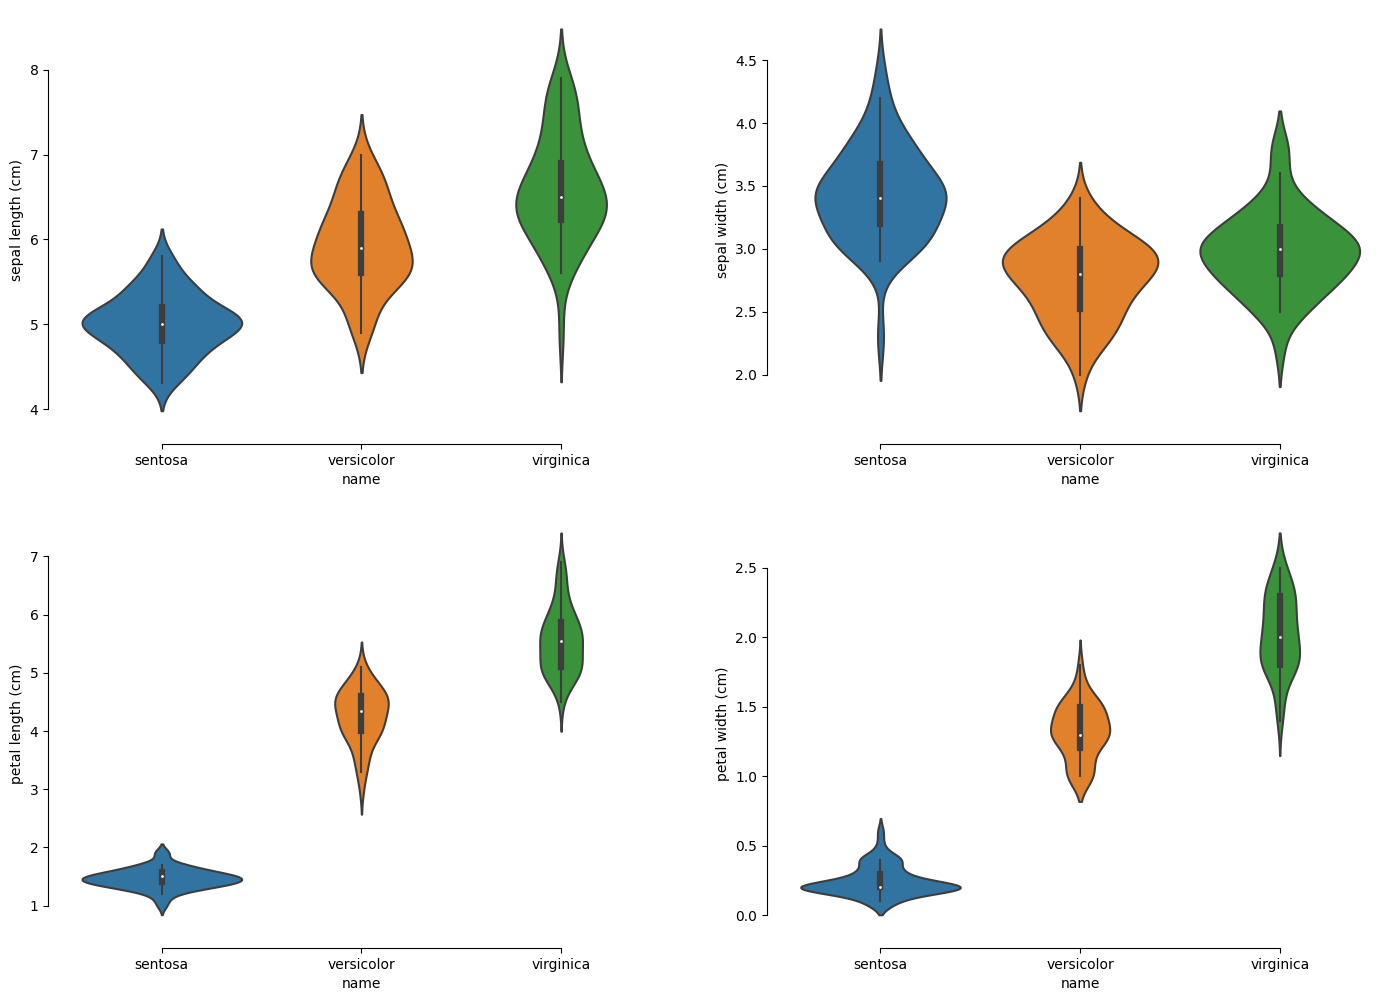

In [95]:
def plot_violin(y2,i):
    plt.subplot(2,2,i)
    
    sns.violinplot(x='name',y= y2, data=df)
plt.figure(figsize=(17,12))
i = 1
for measurement in df.columns[:-2]:
    plot_violin(measurement,i)
    sns.despine(offset=10, trim=True)
    i += 1

From the above violin plots we can notice hight density of the length and width of sentosa species, especialy for sepal length, petal length and petal width. Also we can observe that the mean values and the interquartile range for the petal measurements are easily distinguish, althought the values of virginica species are more spreade

### 3) Training the ML model

In [96]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'name'],
      dtype='object')

In [97]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
Y = df['name']

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Cross Validation Set

In [99]:
cv_scores = cross_val_score(neigh, X, Y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean CV Accuracy: 0.9666666666666668


In [100]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 10)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X, Y)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'n_neighbors': 6}
Best Accuracy: 0.9800000000000001


In [101]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh

KNeighborsClassifier(n_neighbors=3)

In [102]:
neigh.fit(X_train, Y_train)
score = neigh.score(X_train, Y_train)
score

0.95

as the score shows its actually doing good on the given dataset

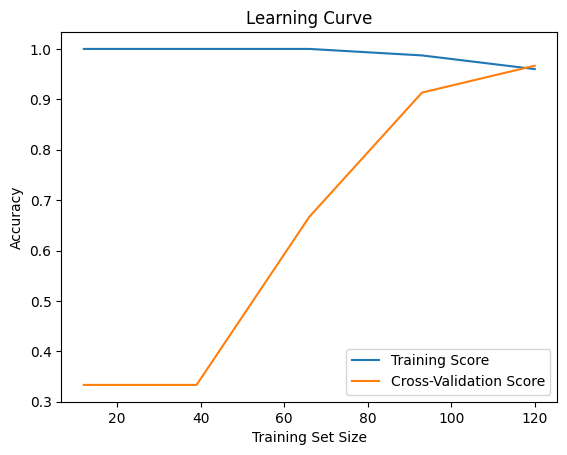

In [103]:
train_sizes, train_scores, test_scores = learning_curve(neigh, X, Y, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()

### as we can see above our model is giving us very nice accuracy

In [104]:
test_predict = neigh.predict(X_test)
test_predict

array(['sentosa', 'virginica', 'sentosa', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'sentosa', 'sentosa', 'versicolor',
       'virginica', 'sentosa', 'versicolor', 'virginica', 'sentosa',
       'sentosa', 'versicolor', 'versicolor', 'virginica', 'sentosa',
       'virginica', 'sentosa', 'versicolor', 'virginica', 'virginica',
       'sentosa', 'sentosa', 'versicolor', 'versicolor', 'versicolor'],
      dtype=object)

In [105]:
print(classification_report(test_predict, Y_test))

              precision    recall  f1-score   support

     sentosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

